<a href="https://colab.research.google.com/github/ngoctran1910/GA/blob/master/k_coverage_m_connectivity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Constants
AREA_SIZE = [100, 100]
GRID_SIZE = [10, 10]
TARGET_POSITIONS = 121
POPULATION_SIZE = 100
INDIVIDUAL_SIZE = 100 #number of potential locations
NUMBER_OF_SENSORS = 20
SINK_LOCATION = [50, 50]
GEN_MAX = 250

COMMUNICATION_RANGE = 30
SENSING_RANGE = 15
DESIRED_CONNECTIVITY = 4
DESIRED_COVERAGE = 2

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt

(100, 100)


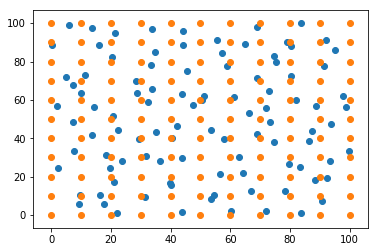

In [0]:
#Initial
def get_dots(width, height, pitch):
  xs = []
  ys = []
#     pos = np.zeros(100, 2)
  for y in range(height // pitch):
    for x in range(width // pitch):
      xs.append((x + random.random()) * pitch)
      ys.append((y + random.random()) * pitch)
  pos = np.array((xs, ys)).T
  return pos

potentialPos = get_dots(100, 100, 10)
xs, ys = potentialPos.T
plt.scatter(xs, ys)
# plt.axis((0., 100., 0., 100.))
plt.show

targetPos = []
i =0 ; j= 0
while i <= AREA_SIZE[0]:
  while j <= AREA_SIZE[1]:
    targetPos.append([i, j])
    j = j + 10
  j = 0
  i = i + 10
targetPos = np.array(targetPos)
#print(targetPos.shape)
x, y = targetPos.T
plt.scatter(x, y)
plt.show

targetToPotential = np.zeros((INDIVIDUAL_SIZE, TARGET_POSITIONS)) #cột i là khoảng cách từ target location i đến các điểm có thể đặt sensors
for i in range(potentialPos.shape[0]):
  for j in range(targetPos.shape[0]):
    temp = np.linalg.norm(potentialPos[i]-targetPos[j])
    targetToPotential[i][j] = temp if temp != 0 else 0.001 
# print(targetToPotential.shape)

potentialToPotential = np.zeros((INDIVIDUAL_SIZE, INDIVIDUAL_SIZE))
for i in range(INDIVIDUAL_SIZE):
  for j in range(INDIVIDUAL_SIZE):
    potentialToPotential[i][j] = np.linalg.norm(potentialPos[i]-potentialPos[j])
print(potentialToPotential.shape)

In [0]:
#Cac ham can thiet
def createIndividual():
  individual = [0] * INDIVIDUAL_SIZE
  index = [] #lưu vị trí sẽ chọn đặt sensor
#   print(len(individual))
  for i in range(NUMBER_OF_SENSORS):
    tmp = random.randint(0, INDIVIDUAL_SIZE - 1)
    while(index.count(tmp) == 1):
      tmp = random.randint(0, INDIVIDUAL_SIZE - 1)
    index.append(tmp)
  for i in range(NUMBER_OF_SENSORS):
    a = int(index[i])
    individual[a] = 1 
  return individual
#   return len(individual)
# indi = createIndividual()
# print(indi)
# print(len(indi))

def createPopulation():
  population = np.zeros((POPULATION_SIZE, INDIVIDUAL_SIZE))
  for i in range(POPULATION_SIZE):
    population[i] = np.array((createIndividual()))
  return population
a = createPopulation()
# print(a.shape)

def computeCoverage(indi):
  tmp2 = np.array([indi,]*TARGET_POSITIONS).transpose()
#   print(tmp2.shape, dist.shape)
  tmp3 = tmp2 * targetToPotential
  cov = 0
  for i in range(TARGET_POSITIONS):
    y = tmp3[:, i]
    x = np.count_nonzero((y > 0) & (y <= SENSING_RANGE))
    if(x >= DESIRED_COVERAGE):
      cov = cov + 1
    else:
      cov = cov + 1.0 * (x/(DESIRED_COVERAGE))
  return round(cov/TARGET_POSITIONS, 2)
print(computeCoverage(a[0]))

def computeConnectivity(indi):
  con = 0
#   tmp = numpy.array(indi)
  tmp4 = np.array([indi,]*INDIVIDUAL_SIZE)
#   print(tmp4.shape)
  tmp5 = tmp4 * potentialToPotential
  tmp4 = tmp4.transpose()
  tmp5 = tmp5 * tmp4
  for i in range(INDIVIDUAL_SIZE):
    y1 = tmp5[:, i]
    x1 = np.count_nonzero((y1>0) & (y1 <= COMMUNICATION_RANGE))
    if(x1 >= DESIRED_CONNECTIVITY):
      con = con + 1
    else:
      con = con + 1.0 * (x1/DESIRED_CONNECTIVITY)
  return round(con/NUMBER_OF_SENSORS, 2)
print(computeConnectivity(a[0]))

def crossover(tmp1, tmp2):
  crossoverPoint = random.randint(0, INDIVIDUAL_SIZE - 1)
#   print(crossoverPoint)
#   tmp1 = indi1.copy()
#   tmp2 = indi2.copy()
  tmp11 = tmp1.copy()
  tmp1[crossoverPoint:] = tmp2[crossoverPoint:]
  tmp2[crossoverPoint:] = tmp11[crossoverPoint:]
  if random.randint(0, 100) % 2 == 0:
    return tmp2
  return tmp1
print(a[0])
# print(a[1])
# print(crossover(a[0], a[1]))
# print(a[0], a[1])

def mutate(tmp, mutationRate = 0.05):
#   tmp = indi.copy()
  for i in range(INDIVIDUAL_SIZE):
    if random.random() < mutationRate:
      x = tmp[i]
      if x == 1:
        tmp[i] = 0
      else:
        tmp[i] = 1
  return tmp
# print(np.count_nonzero(mutate(crossover(a[0], a[1]))))
# print(np.count_nonzero(a[0]))

def repair(indi):
  x = np.count_nonzero(indi)
  if x < NUMBER_OF_SENSORS:
    tmp = np.where(indi == 0)
#     for _ in range(NUMBER_OF_SENSORS - x):
    pos = random.sample(list(tmp[0]), NUMBER_OF_SENSORS - x)
    for i in pos:
      indi[int(i)] = 1
  else:
    if x > NUMBER_OF_SENSORS:
      tmp = np.where(indi == 1)
#       for i in range(x - NUMBER_OF_SENSORS):
      pos = random.sample(list(tmp[0]), x - NUMBER_OF_SENSORS)
      for i in pos:
        indi[int(i)] = 0
  return indi
      
# repair(mutate(a[0]))
# print(np.count_nonzero(a[0]))

def computeFitness(indi, _lambda):
  return round(_lambda * computeCoverage(indi) + (1-_lambda)*computeConnectivity(indi), 2)

def checkNonDominated(fv1, fv2): #check if fv2 dominated fv1
  if np.count_nonzero(fv1 <= fv2) == 2:
    if np.count_nonzero(fv1 < fv2) >= 1:
      return True
  return False
# a = createPopulation()
# fv1 = np.array((computeConnectivity(a[0]), computeCoverage(a[0])))
# fv2 = np.array((computeConnectivity(a[1]), computeCoverage(a[1])))
# print(fv1)
# print(fv2)
# if checkNonDominated(fv1, fv2) == True:
#   print("fv2 dominate fv1")
# else:
#   print("fv1 dominate fv2")

0.48
0.76
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0.]


1


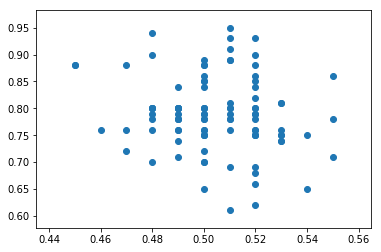

In [0]:
#main
FV = np.zeros((POPULATION_SIZE, 2))
for i in range(POPULATION_SIZE):
  FV[i] = computeCoverage(a[i]), computeConnectivity(a[i])
x, y = FV.T
plt.scatter(x, y)
plt.show
#   print(FV[i])
#   print("\n")
EP = [[0]*INDIVIDUAL_SIZE]
a = createPopulation()
# print(a)

# print(a[1])
# y = crossover(a[1], a[2])
# a[1] = y
# print(a[1])
# repair(mutate(a[1]))
# print(a[1])
# print(np.count_nonzero(a[1]))
# print(a[1].shape)
# # a[1] = repair(a[1])
# print(a[1])
# print(np.count_nonzero(a[1]))
EP_compute = []
index = []
print(len(EP))
for gen in range(250):
  for i in range(POPULATION_SIZE - 1):
#     yy = [0] * INDIVIDUAL_SIZE
    a[i] = crossover(a[i], a[i+1].copy())
    mutate(a[i])
    repair(a[i])
#     a[i] = yy
#     print(a[i])
    FV[i] = computeCoverage(a[i]), computeConnectivity(a[i])
    lambda_i = 1.0 * (i/POPULATION_SIZE)
    y_fitness = computeFitness(a[i], lambda_i)
    neighbor_fitness = computeFitness(a[i+1], 1.0 * ((i+1)/POPULATION_SIZE))
    if y_fitness > neighbor_fitness:
      a[i+1] = a[i]
      FV[i + 1] = FV[i]
    count = 0
    index = []
    for j in range(len(EP)):
      tmp = [computeCoverage(EP[j]), computeConnectivity(EP[j])]
      if checkNonDominated(tmp, FV[i]) == True:
        index.append(list(EP[j]))
#         if list(a[j]) in EP:
#         EP.remove(EP[j])
#         EP_compute.remove(EP_compute[j])
      if checkNonDominated(FV[i], tmp) == True:
        count = count + 1
    EP = [ele for ele in EP if ele not in index]
    if count == 0:
      EP.append(list(a[i]))
#       EP_compute.append(list(FV[i]))
#     print(a[i+1])
#   print(a)
  
  
  

In [0]:
a = createPopulation()

for i in range(4):
  print(a[i])
  a[i] = crossover(a[i], a[i+1].copy())
  print(a[i])
  mutate(a[i])
  print(a[i])
  repair(a[i])
  print(a[i])
  print("\n")
  

7
[[ 54.  96.]
 [ 56.  91.]
 [ 57.  90.]
 [ 60.  86.]
 [ 51.  99.]
 [ 45. 100.]
 [ 56.  91.]]
0   [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1   [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

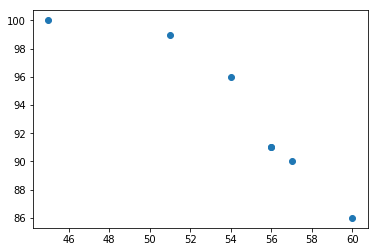

In [0]:
# tmp = np.zeros((POPULATION_SIZE, 2))
# for i in range(POPULATION_SIZE):
#   tmp[i] = computeCoverage(EP[i]), computeConnectivity(EP[i])
# print(tmp)
FV1 = np.zeros((len(EP), 2))
print(len(EP))
# print(round(computeCoverage(EP[40]), 2))
# print(computeConnectivity(EP[40]))
# print(np.count_nonzero(EP[40]))
for i in range(len(EP)):
  if np.count_nonzero(EP[i]) != NUMBER_OF_SENSORS:
    print(i, " ", np.count_nonzero(EP[i]))
for i in range(len(EP)):
  FV1[i] = computeCoverage(EP[i])*100, computeConnectivity(EP[i])*100
x, y = FV1.T
plt.scatter(x, y)
plt.show
print(FV1)

for i in range(len(EP)):
#   if FV1[i, :] == 58:
    print(i, " ", EP[i])
# if checkNonDominated(FV1[656], FV1[661]):
#   print("661 dominated 656")
# else:
#   print("NOT")
test = [1]
for i in range(len(test)):
  print(i)

[1, 5, 14, 15, 23, 28, 30, 31, 36, 38, 46, 51, 60, 63, 68, 75, 81, 82, 84, 88]
[[1, 14], [1, 23], [1, 30], [1, 31], [5, 14], [5, 15], [5, 23], [5, 36], [14, 1], [14, 5], [14, 15], [14, 23], [14, 31], [14, 36], [15, 5], [15, 14], [15, 23], [15, 36], [23, 1], [23, 5], [23, 14], [23, 15], [23, 30], [23, 31], [23, 36], [28, 36], [28, 38], [28, 46], [30, 1], [30, 23], [30, 31], [30, 51], [31, 1], [31, 14], [31, 23], [31, 30], [31, 51], [36, 5], [36, 14], [36, 15], [36, 23], [36, 28], [36, 38], [36, 46], [38, 28], [38, 36], [38, 46], [38, 68], [46, 28], [46, 36], [46, 38], [46, 68], [51, 30], [51, 31], [51, 60], [51, 63], [51, 82], [60, 51], [60, 63], [60, 81], [60, 82], [63, 51], [63, 60], [63, 75], [63, 81], [63, 82], [63, 84], [68, 38], [68, 46], [68, 75], [68, 88], [75, 63], [75, 68], [75, 84], [75, 88], [81, 60], [81, 63], [81, 82], [81, 84], [82, 51], [82, 60], [82, 63], [82, 81], [82, 84], [84, 63], [84, 75], [84, 81], [84, 82], [88, 68], [88, 75]]
17.775643074456966


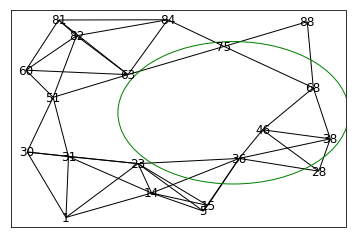

In [0]:
def getVertices(indi):
  return [i for i in range(INDIVIDUAL_SIZE) if indi[i] == 1]
print(getVertices(EP[0]))

def getEdges(indi):
  tmp4 = np.array([indi,]*INDIVIDUAL_SIZE)
#   print(tmp4.shape)
  tmp5 = tmp4 * potentialToPotential
  tmp4 = tmp4.transpose()
  tmp5 = tmp5 * tmp4
  edges = []
  for i in getVertices(indi):
    e = tmp5[int(i)]
    for j in range(100):
      if e[j] > 0 and e[j] < COMMUNICATION_RANGE:
        edges.append([i, j])
  return edges
print(getEdges(EP[0]))
import networkx as nx
fig, ax = plt.subplots()
G=nx.Graph()
G.add_nodes_from(getVertices(EP[0]))
G.add_edges_from(getEdges(EP[0]))
posdict = {}
for i in getVertices(EP[0]):
  posdict[i] = tuple((potentialPos[i]))
print(posdict[1][0])
# ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
nx.draw(G, posdict, with_labels=True, node_size=0)
ax.add_patch(plt.Circle((61.259824439625575, 49.658460149680046), radius=30, color='g', fill=False))

plt.axis('on')
plt.show()

{13: (39.6340254192196, 16.789457664581988), 15: (54.59403710108512, 10.618832984092661), 17: (78.29628775921314, 12.415637400138625), 19: (92.28930289525397, 19.41093275760354), 24: (43.81554466179601, 29.62230909986994), 32: (29.320955586412637, 39.59474504121946), 38: (86.42431171364663, 38.677148421576995), 42: (22.40760040607976, 44.2863930631188), 46: (68.83667149485832, 42.48492847763211), 54: (47.60729046197998, 57.12287461814496), 60: (7.369217689730512, 67.59717681428354), 65: (51.195279853543205, 61.95313013237188), 72: (28.321744201321444, 70.06346329965595), 73: (33.316832563772785, 77.94948117614152), 78: (80.46390236181787, 72.25638205117075), 84: (44.208505800107304, 88.85084481140876), 86: (65.05172502529867, 89.00695375364093), 89: (95.01027514394946, 86.07748444417767), 96: (69.07264599884893, 98.06336480538336), 99: (92.07501134583993, 91.3883833279673)}


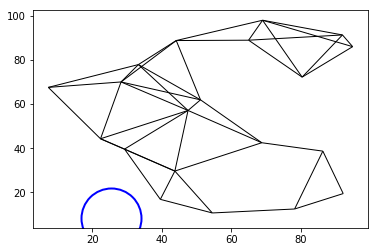

In [0]:
fig, ax = plt.subplots()
G=nx.Graph()
G.add_nodes_from(getVertices(EP[2]))
G.add_edges_from(getEdges(EP[2]))
posdict = {}
for i in getVertices(EP[2]):
  posdict[i] = tuple((potentialPos[i]))
print(posdict)
# ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
nx.draw_networkx_nodes(G, posdict, with_labels=True, node_size=0, ax = ax)
nx.draw_networkx_edges(G, posdict, with_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.plot(25.320913584497404, 8.368173954721362, 'o', ms=30 * 2, mec='b', mfc='none', mew=2)

# plt.axis('on')
# plt.show()

In [0]:
potentialToSink = np.zeros((INDIVIDUAL_SIZE))
for i in range(INDIVIDUAL_SIZE):
  potentialToSink[i] = np.linalg.norm(potentialPos[i] - np.array((SINK_LOCATION)))
print(potentialToSink)



[66.32312484 54.21563798 48.39696526 47.89642833 43.9667133  40.98724529
 43.39071421 52.92390991 56.5502571  64.96217266 56.29602868 53.20598725
 43.93252771 34.81181439 33.23148598 40.92336441 39.39868333 48.14388916
 47.44570002 56.08425547 49.70425446 41.2486111  37.25113611 29.21632917
 23.05691024 26.95814321 27.52042321 33.69781986 45.38476488 50.15350476
 52.06935337 41.09619059 27.24288693 25.48764482 19.57212205 14.54543405
 24.03304928 33.1651244  40.80214833 46.12557986 41.45563291 31.5323245
 22.2561312  14.72078516  9.63516944  2.47665461 11.26500315 21.3668457
 33.02218027 42.58195941 44.89940393 30.33801589 30.61136006 17.78425641
 11.51872964  5.34124727 18.4607871  28.18209917 34.69084375 44.42680339
 44.4435666  38.34015721 30.09214841 24.54250661 17.89219779 14.62234518
 18.80371271 32.03595246 35.79284213 48.70119905 52.32729513 42.2483488
 35.41900953 34.12729502 24.02403778 29.80799985 31.7293095  34.42487955
 41.42388504 50.71982673 52.37460788 49.42458674 47.51